In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import numpy as np

In [2]:
data = pd.read_csv("Data\\preguntas.csv", sep=',', encoding = "ISO-8859-1")
data.head(3)

,Pregunta,respuesta,Tema,Pers/empresa,Polarity
0,Hola una pregunta en que perjudica el acta de ...,NaN,Renuncia/Despido/Desahucio,persona,0
1,PARA CALCULAR EL DESAHUCIO SE DEBE TOMAR EN CU...,NaN,Renuncia/Despido/Desahucio,persona,0
2,supuestamente Correa emitió el decreto 225 dod...,NaN,Jubilacion Patronal,persona,0


In [3]:
data.Tema.value_counts()

Jubilacion Patronal                                    78
Renuncia/Despido/Desahucio                             22
IESS                                                   16
Greeting                                               10
Contacto                                               10
Otros servicios (Charlas/Capacitaciones/Financiera)     8
Consultoria                                             7
job seeker                                              6
Ambiguous                                               6
Queja                                                   5
Hi Five                                                 5
Otras Consultas                                         2
Name: Tema, dtype: int64

In [4]:
p2 = []
for p in data.Pregunta:
    p2.append(' '.join(p.split()))
data['Pregunta2'] = p2

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
import unidecode
from nltk.stem import SnowballStemmer

In [6]:
stop = stopwords.words('spanish')
tokenizer = RegexpTokenizer(r'\w+')
stemmer = SnowballStemmer("spanish")

In [7]:
stop = stop + ['hola', 'cuanto', 'cuesta', 'ustedes', 'buenas', 'tardes', 'favor', 'dias', 'necesito', 'buenos', 'si', 'saber', 'gracias', 'ayudar', 
     '2017', '2018', '2016', '2019', 'ayuden', 'consulta', 'podria', 'pregunta', 'realizar', 'puede', 'pueden', 'mas', 'debe', 'tomar',
         'supuestamente', 'buen', 'par', 'com', 'sab', 'hol', 'pregunt', 'tard', 'ayud']  #For topics!!! (for other actions it may be different)

In [8]:
topicjp = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Jubilacion Patronal']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicjp[w]+=1 

In [ ]:
for w in sorted(topicjp, key=topicjp.get, reverse=True):
    print(w, topicjp[w])

In [9]:
topicjp = ['actuarial', 'jubilacion', 'estudi', 'patronal', 'empres', 'calcul', 'trabaj', 'jubil', 
     'provision', 'emple', 'desahuci', 'aport', 'proporcional', 'derech', 'descuent', 'pension', 'niif', 'nec']

In [10]:
topicRen = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Renuncia/Despido/Desahucio']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicRen[w]+=1 

In [ ]:
for w in sorted(topicRen, key=topicRen.get, reverse=True):
    print(w, topicRen[w])

In [11]:
topicRen = ['desp', 'desahuci', 'liquidacion', 'calcul', 'valor', 'renunci', 'intempest', 'acta', 
     'finiquit', 'jubilacion', 'emple', 'empres', 'actuarial', 'bonificacion']

In [12]:
topicIESS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'IESS']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicIESS[w]+=1 

In [ ]:
for w in sorted(topicIESS, key=topicIESS.get, reverse=True):
    print(w, topicIESS[w])

In [13]:
topicIESS = ['aport', 'iess', 'jubil', 'trabaj', 'jubilacion', 'calcul', 
     'raiz', 'sesentav', 'imposicion', 'invalidez', 'aportacion', 'montepi']

In [14]:
topiContacto = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Contacto']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topiContacto[w]+=1 

In [ ]:
for w in sorted(topiContacto, key=topiContacto.get, reverse=True):
    print(w, topiContacto[w])

In [15]:
topiContacto = ['corre', 'guayaquil', 'envi', 'electron', 'retencion', 'direccion', 'contact', 
     'telefonicamet', 'ciud', 'actuari', 'gye', 'quit', 'ubic', 'estan', 'contest', 'empres', 'transferent', 'factur']

In [16]:
topicOS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Otros servicios (Charlas/Capacitaciones/Financiera)']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicOS[w]+=1 

In [ ]:
for w in sorted(topicOS, key=topicOS.get, reverse=True):
    print(w, topicOS[w])

In [17]:
topicOS = ['capacit', 'laboral', 'financ', 'human', 'charl', 'cup']

In [18]:
topiCons = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Consultoria']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topiCons[w]+=1 

In [ ]:
for w in sorted(topiCons, key=topiCons.get, reverse=True):
    print(w, topiCons[w])

In [19]:
topiCons = ['not', 'tecnic', 'actuari', 'machin', 'learning', 'evalu', '360', 'consultori', 'rrc']

In [20]:
topicJS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'job seeker']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicJS[w]+=1 

In [ ]:
for w in sorted(topicJS, key=topicJS.get, reverse=True):
    print(w, topicJS[w])

In [21]:
topicJS = ['hoj', 'vid', 'cv', 'entrev', 'trabaj', 'personal', 'oportun', 'laboral']

In [22]:
topics = {}
topics['JP'] = topicjp
topics['Ren'] = topicRen
topics['IESS'] = topicIESS
topics['Cont'] = topiContacto
topics['OS'] = topicOS
topics['Cons'] = topiCons
topics['JS'] = topicJS

In [23]:
topicLik = defaultdict(list)
for frase,tema in zip(data.Pregunta2, data.Tema):    
    for w in tokenizer.tokenize(unidecode.unidecode(frase.lower())):
        w = stemmer.stem(w)
        if w not in stop:
            topicLik[w].append(tema)  

In [24]:
liktopics = {}
tops = ['Jubilacion Patronal', 'Renuncia/Despido/Desahucio', 'IESS', 'Contacto', 
            'Otros servicios (Charlas/Capacitaciones/Financiera)', 'Consultoria', 'job seeker']
for k,t in zip(topics.keys(), tops):
    l = []
    for w in topics[k]:        
        lik = topicLik[w].count(t)/len(topicLik[w])
        l.append(lik)
    liktopics[k] = l


In [25]:
all_topics = topicjp +  topicRen + topicIESS + topiContacto + topicOS + topiCons +  topicJS
#all_topics = list(set(all_topics))

In [26]:
all_topics = topicjp
for t in topicRen:
    if t not in all_topics:
        all_topics.append(t)
    for t in topicIESS:
        if t not in all_topics:
            all_topics.append(t)
        for t in topiContacto:
            if t not in all_topics:
                all_topics.append(t)
            for t in topicOS:
                if t not in all_topics:
                    all_topics.append(t)
                for t in topiCons:
                    if t not in all_topics:
                        all_topics.append(t)
                    for t in topicJS:
                        if t not in all_topics:
                            all_topics.append(t)

In [27]:
jbtopdict = {}
t = 'Jubilacion Patronal'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    jbtopdict[w] = lik

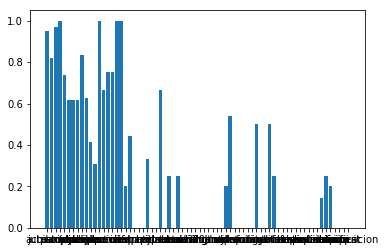

In [28]:
fig, ax = plt.subplots()
plt.bar(jbtopdict.keys(), jbtopdict.values())
plt.show()

In [29]:
rentopdict = {}
t = 'Renuncia/Despido/Desahucio'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    rentopdict[w] = lik

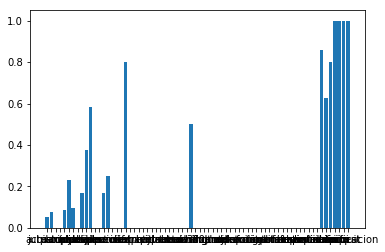

In [30]:
fig, ax = plt.subplots()
plt.bar(rentopdict.keys(), rentopdict.values())
plt.show()

In [31]:
IESStopdict = {}
t = 'IESS'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    IESStopdict[w] = lik

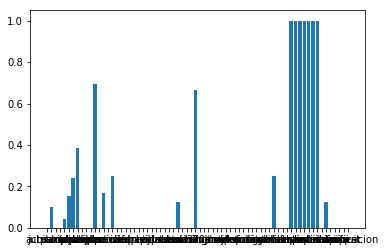

In [32]:
fig, ax = plt.subplots()
plt.bar(IESStopdict.keys(), IESStopdict.values())
plt.show()

In [33]:
CONTtopdict = {}
t = 'Contacto'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    CONTtopdict[w] = lik

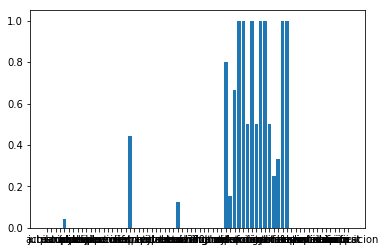

In [34]:
fig, ax = plt.subplots()
plt.bar(CONTtopdict.keys(), CONTtopdict.values())
plt.show()

In [35]:
OStopdict = {}
t = 'Otros servicios (Charlas/Capacitaciones/Financiera)'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    OStopdict[w] = lik

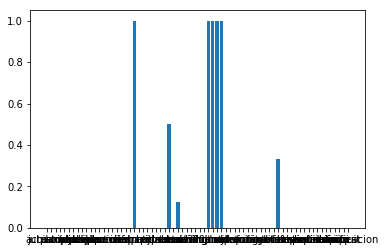

In [36]:
fig, ax = plt.subplots()
plt.bar(OStopdict.keys(), OStopdict.values())
plt.show()

In [37]:
CONStopdict = {}
t = 'Consultoria'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    CONStopdict[w] = lik

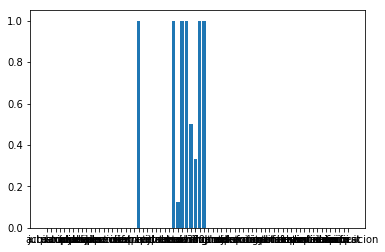

In [38]:
fig, ax = plt.subplots()
plt.bar(CONStopdict.keys(), CONStopdict.values())
plt.show()

In [39]:
JStopdict = {}
t = 'job seeker'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    JStopdict[w] = lik

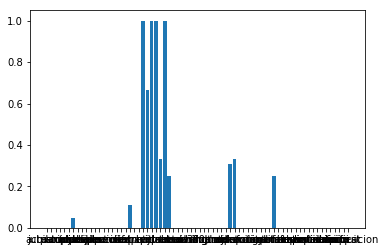

In [40]:
fig, ax = plt.subplots()
plt.bar(JStopdict.keys(), JStopdict.values())
plt.show()

In [41]:
np.save('Data\\jbtopdict.npy', jbtopdict) ; np.save('Data\\rentopdict.npy', rentopdict) ; 
np.save('Data\\IESStopdict.npy', IESStopdict) ; np.save('Data\\CONTtopdict.npy', CONTtopdict) ; 
np.save('Data\\OStopdict.npy', OStopdict) ; np.save('Data\\CONStopdict.npy', CONStopdict) ;
np.save('Data\\JStopdict.npy', JStopdict) 

In [ ]:
https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/?completed=/stemming-nltk-tutorial/

In [ ]:
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [ ]:
The likelihodd should be for word w, if occurrs, in what percentage of the topics where w occurss belong to class k
 